In [49]:
# https://github.com/mdtraj/mdtraj/blob/master/examples/hbonds.ipynb
from __future__ import print_function
from pathlib import Path
import itertools
import mdtraj as md
#import mdtraj.testing
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
result_dir = Path("./results/EGPR_tutorial")
top = md.load_pdb(str(result_dir / "3POZ_03P_minimized.pdb"))
t = md.load_xtc(str(result_dir / "3POZ_03P_3rd_trajectory.xtc"), top=top.top)
print(t)

<mdtraj.Trajectory with 250 frames, 52862 atoms, 16273 residues, and unitcells>


In [51]:
protein = t.topology.select("protein")
ligand = t.topology.select("resname UNK")

* md.baker_hubbard identifies hydrogen bonds baced on cutoffs for the Donor-H...Acceptor distance and angle. The criterion employed is 
 and 
 in at least 10% of the trajectory. The return value is a list of the indices of the atoms (donor, h, acceptor) that satisfy this criteria.

In [52]:
hbonds = md.baker_hubbard(t, periodic=False)
hbonds.shape

(437, 3)

In [53]:
labels = dict()
for i, hbond in enumerate(hbonds):
    if (((hbond[0] in protein) and (hbond[2] in ligand)) or # ligand is acceptor
        ((hbond[0] in ligand) and (hbond[2] in protein))): # ligand is donor
        if not (hbond[0] in ligand and hbond[2] in ligand): # don't count ligand-ligand hbonds
            print(i, t.topology.atom(hbond[0]), t.topology.atom(hbond[2]))
            labels[str(i)] = f"{t.topology.atom(hbond[0])}-{t.topology.atom(hbond[2])}"
            

55 LYS45-NZ UNK1-O3x
112 MET93-N UNK1-N4x


In [54]:
da_distances = md.compute_distances(t, hbonds[:, [0, 2]], periodic=False)

In [60]:
da_distances.shape

(250, 437)

LYS45-NZ-UNK1-O3x bonds distance means 0.47nm and std 0.14nm
MET93-N-UNK1-N4x bonds distance means 0.32nm and std 0.02nm


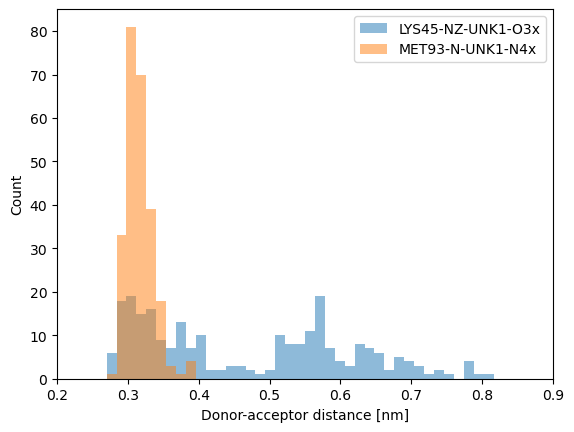

In [89]:
#color = itertools.cycle(["r", "b"])
for i in [55, 112]:
    plt.hist(da_distances[:, i], label=labels[str(i)], alpha=0.5, range=(0.2, 0.9), bins=50) 
    print(f"{labels[str(i)]:s} bonds distance means {da_distances[:, i].mean():.2f}nm"
           f" and std {da_distances[:, i].std():.2f}nm")
plt.legend()
plt.ylabel("Count")
plt.xlim(0.2, 0.9)
plt.xlabel("Donor-acceptor distance [nm]"); # hydrogen bond distance between heavy atom is typically < 0.30 nm

In [14]:
# https://ctlee.github.io/BioChemCoRe-2018/h-bond/

In [33]:
n_frame = len(t)

In [34]:
all_hbonds_set = set()
hbonds_each_frame = []

In [35]:
Frame2hbonds = dict()
for frame in range(n_frame):
    Frame2hbonds[frame] = []
    hbonds = md.baker_hubbard(t[frame])
    hbonds_each_frame.append(hbonds)
    for hbond in hbonds:
        if ((hbond[0] in protein) and (hbond[2] in ligand) or
            (hbond[0] in ligand) and (hbond[2] in protein)):
            if not (hbond[0] in ligand and hbond[2] in ligand):
                all_hbonds_set.add(tuple(hbond))
                Frame2hbonds[frame].append(tuple(hbond))
# this take a while 1-2 min for 250 frames

In [36]:
x = [] # frame
y = [] # number of hbonds

In [37]:
for frame in Frame2hbonds:
    x.append(frame)
    y.append(len(Frame2hbonds[frame]))

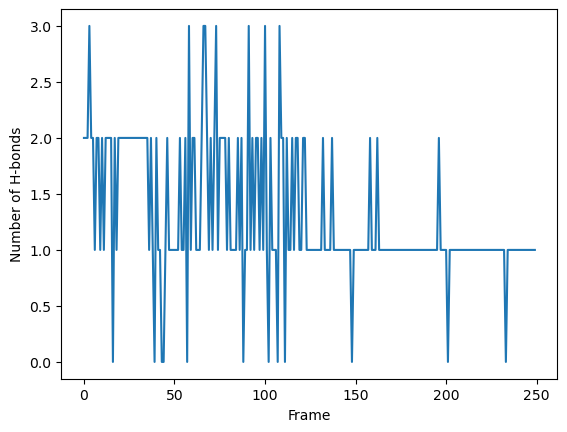

In [38]:
plt.plot(x, y)
plt.xlabel("Frame")
plt.ylabel("Number of H-bonds")
plt.show()

* Since md.baker_hubbard counts at 10% of the trajectory, former analysis show 2 hbonds.
* but frame analysis  show 3 hbonds is some frames.